_**Hello,**_

_**My name is Subhash Kumar Rana, This is a NoteBook File (.ipynb)
And In this Section I build and practice code for this YT Channel Dasboard so i can use this code in my Final Project.**_

**Roll no.: 2312res664**

**I'd or Mail: subhash_2312res664@iitp.ac.in**



# This is a nootbook of YouTube Channel Analytics Dashboard with py code.
* Tryl And Test (Subhash Kumar)

### So First we load Data which we extract from API

In [103]:
import pandas as pd     #Importing Pandas


In [ ]:
%%sql


In [104]:
file_path = "youtube_channel_data.csv"      #File Path
df = pd.read_csv(file_path)                 #Load data

In [21]:
print(df.head())    #Display Top 10 Data in Dataset

       VideoID                                              Title  \
0  3UMBcd3TyhQ  What is SEO (Search Engine Optimization) & How...   
1  8RvAdYyvtcM  SEO Tutorial - What is Search Engine Working |...   
2  O6RZPzYxMls  TYPES OF SEO: White Hat, Grey Hat & Black Hat ...   
3  nmX-C9emvEs  On-Page SEO: Big Guide to On-Page Optimization...   
4  2IXS-B_Zafk  Google Keyword Planner Tutorial - What is Keyw...   

                  UploadDate   Views  Likes  Dislikes  Comments  
0  2015-08-22 14:25:10+00:00  419504   3713       NaN       295  
1  2015-09-06 13:50:41+00:00  147843   1061       NaN        76  
2  2015-09-19 08:25:17+00:00  127662   1082       NaN        48  
3  2015-09-19 10:38:26+00:00  248356   2389       NaN       256  
4  2015-09-25 19:01:11+00:00  135444   1429       NaN       310  


In [105]:
print(df.describe())    # Describing Dataset

              Views          Likes  Dislikes     Comments
count  5.654000e+03    5654.000000       0.0  5654.000000
mean   6.683466e+04    1577.990803       NaN    45.169261
std    4.033885e+05   10739.938049       NaN   198.217977
min    1.050000e+02       4.000000       NaN     0.000000
25%    5.868000e+03     143.000000       NaN     6.000000
50%    1.537600e+04     372.000000       NaN    15.000000
75%    4.391050e+04     929.000000       NaN    34.000000
max    2.254503e+07  587547.000000       NaN  7414.000000


In [106]:
print(df.info())    #Dataset Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5654 entries, 0 to 5653
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   VideoID     5654 non-null   object 
 1   Title       5654 non-null   object 
 2   UploadDate  5654 non-null   object 
 3   Views       5654 non-null   int64  
 4   Likes       5654 non-null   int64  
 5   Dislikes    0 non-null      float64
 6   Comments    5654 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 309.3+ KB
None


In [107]:
df1 = df.copy()     # We make a duplicate for original data, and we perform action on copied data.

###  Data Cleaning and Preparation

In [108]:
# Convert 'UploadDate' to datetime
df1['UploadDate'] = pd.to_datetime(df1['UploadDate'])

# Handle 'N/A' values in Dislikes and Comments columns
df1['Dislikes'] = pd.to_numeric(df1['Dislikes'], errors='coerce').fillna(0)
df1['Comments'] = pd.to_numeric(df1['Comments'], errors='coerce').fillna(0)

# Check and handle 'N/A' values in 'Views' and 'Likes' if any, though the inspection showed they are numeric
df1['Views'] = pd.to_numeric(df1['Views'], errors='coerce').fillna(0)
df1['Likes'] = pd.to_numeric(df1['Likes'], errors='coerce').fillna(0)

# Now we are going to Visualize the data:
* **Line: Views over time**
* **Bar: Views per video**
* **Pie: Engagement (Likes/Dislikes/Comments)**

In [109]:
import matplotlib.pyplot as plt     #Importing for Visualization

## Line: Views Over Time

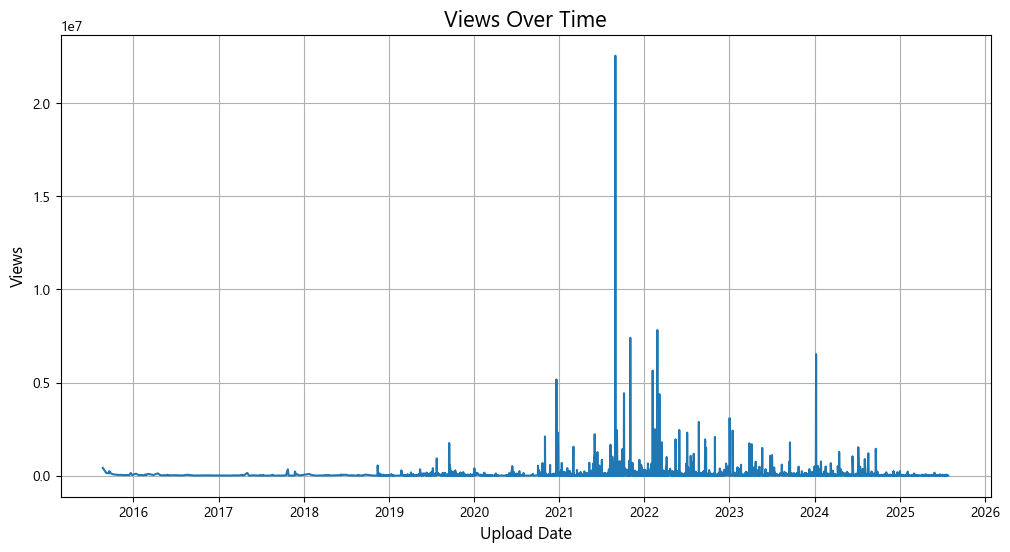

In [110]:
plt.figure(figsize=(12, 6))
df_sorted_by_date = df1.sort_values('UploadDate')
plt.plot(df_sorted_by_date['UploadDate'], df_sorted_by_date['Views'])
plt.title('Views Over Time', fontsize=16)
plt.xlabel('Upload Date', fontsize=12)
plt.ylabel('Views', fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.grid(True)

## Bar: Views per video

In [111]:
plt.rcParams['font.family'] = 'Segoe UI Emoji'      #Sometimes i encounter font warning/error, that why i call this.

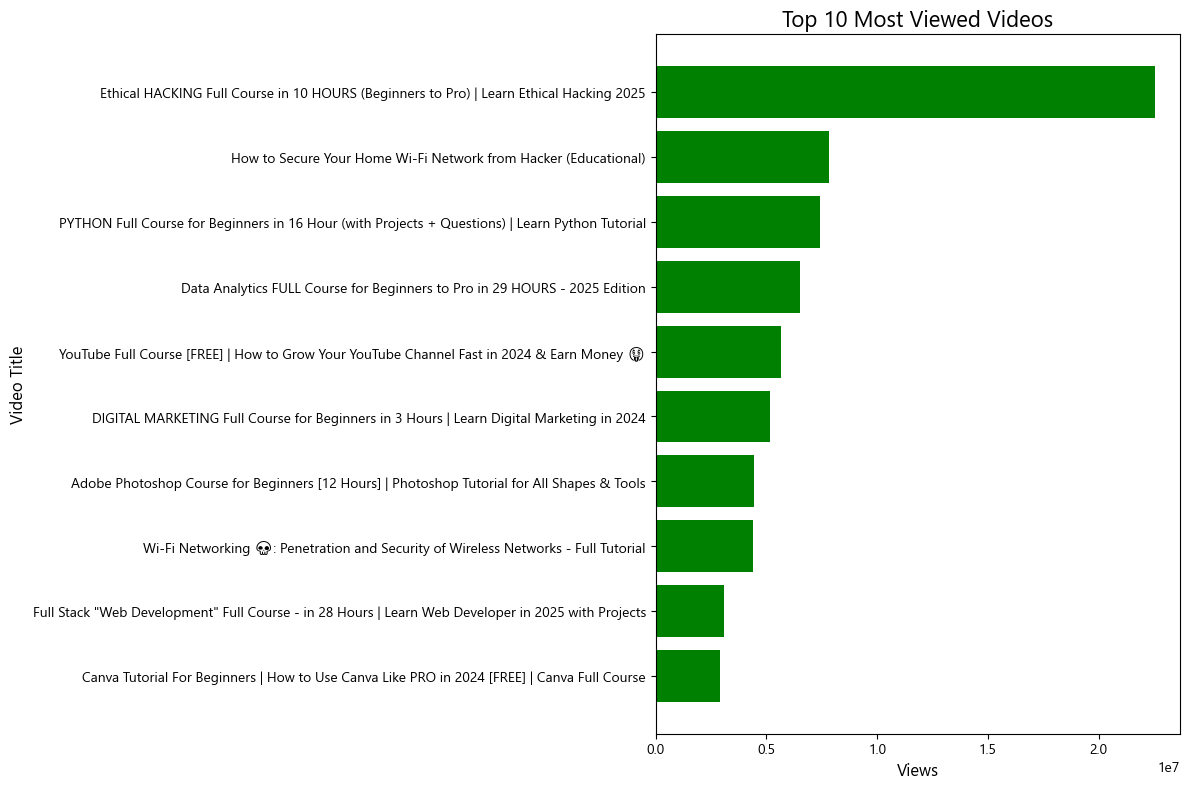

In [113]:
df_sorted_by_views = df.sort_values('Views', ascending=False).head(10)
plt.figure(figsize=(12, 8))
plt.barh(df_sorted_by_views['Title'], df_sorted_by_views['Views'], color='green')
plt.xlabel('Views', fontsize=12)
plt.ylabel('Video Title', fontsize=12)
plt.title('Top 10 Most Viewed Videos', fontsize=16)

plt.gca().invert_yaxis()            # Invert Y-axit.
plt.tight_layout()                  # Use this for better Title visibility

## Pie: Engagement (Likes/Dislikes/Comments)

In [114]:
# Creating a small dictionary with total data:
engagement_data = {
                    ' 👍Likes': df1['Likes'].sum(),
                    ' 👎Dislikes': df1['Dislikes'].sum(),
                    ' 💬Comments': df1['Comments'].sum()
                  }


In [115]:
print(engagement_data)      #Try to disply total data: likes,Comments,Dis.

{' 👍Likes': np.int64(8921960), ' 👎Dislikes': np.float64(0.0), ' 💬Comments': np.int64(255387)}


In [117]:
# Calculating Percentages for data and assigning labels.
total = sum(engagement_data.values())
labels = [
    f'{key} → {value/total*100:.1f}%'
    for key, value in engagement_data.items()
]
print(labels)           # Try to check our calculated data

[' 👍Likes → 97.2%', ' 👎Dislikes → 0.0%', ' 💬Comments → 2.8%']


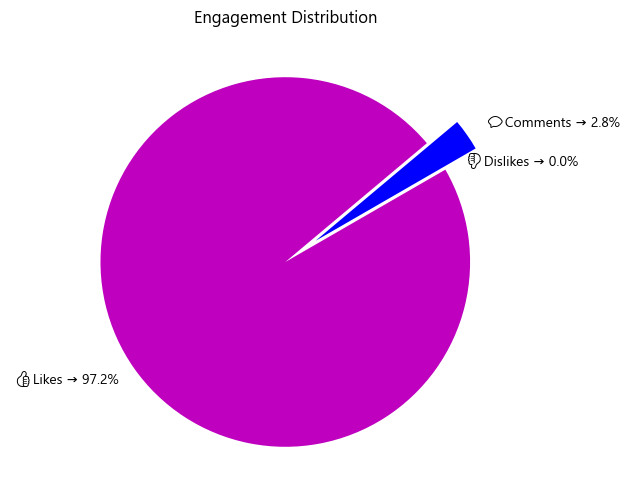

In [127]:
plt.figure(figsize=(6, 6))
plt.pie(engagement_data.values(), labels=labels, colors=['m','0','b'],explode = [0, 0, 0.2],  startangle=40)
plt.title("Engagement Distribution")
plt.show()

**Finally have done this project successfully.**

_THANKS._